### More on Network anaysis and NetworkX


In [9]:
pip install decorator==5.0.7

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Adding and removing nodes

In [2]:
G = nx.Graph()

In [3]:
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

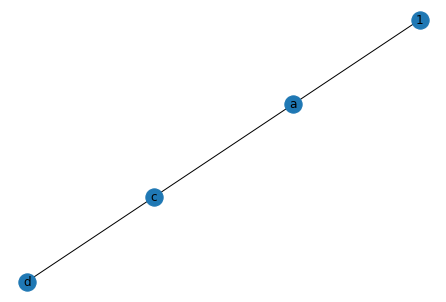

In [10]:
nx.draw(G, with_labels=True)

In [4]:
G.number_of_nodes()

5

In [5]:
G.remove_node(2)

In [6]:
list(G.nodes)

['a', 'c', 'd', 1]

In [8]:
G.degree()

DegreeView({'a': 2, 'c': 2, 'd': 2, 1: 2})

In [36]:
G.degree[1]

1

In [9]:
G.remove_edge(1, "d")

In [11]:
list(G.adj[1]) 

['a']

In [12]:
G = nx.Graph([(1, 2, {"color": "yellow"})])

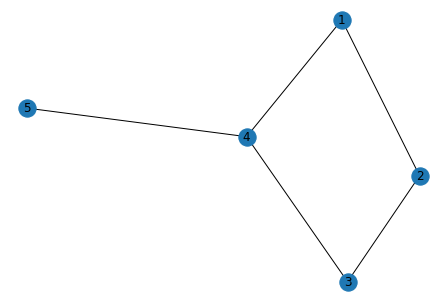

In [19]:
nx.draw(G, with_labels=True)

In [15]:
G[2] # same as G.adj[1]

AtlasView({1: {'color': 'yellow'}})

In [16]:
G[1][2]

{'color': 'yellow'}

In [42]:
G.edges[1, 2]

{'color': 'yellow'}

In [18]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.add_edge(4, 1,weight= 5.1)

In [25]:
weights = nx.get_edge_attributes(G,'weight').values()
colors = nx.get_edge_attributes(G,'color').values()

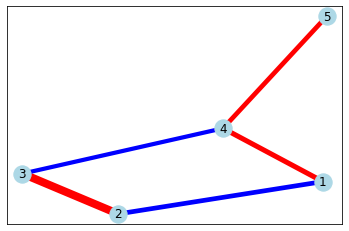

In [26]:
nx.draw_networkx(G, with_labels=True,width=list(weights),edge_color=colors, 
                 node_color='lightblue')

### Directed graphs

The DiGraph class provides additional methods and properties specific to directed edges, e.g., DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() is equivalent to successors() while degree reports the sum of in_degree and out_degree.

In [35]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 10), (3, 1, 0.75), (2, 3, 0.7)])


In [36]:
weights = nx.get_edge_attributes(DG,'weight').values()

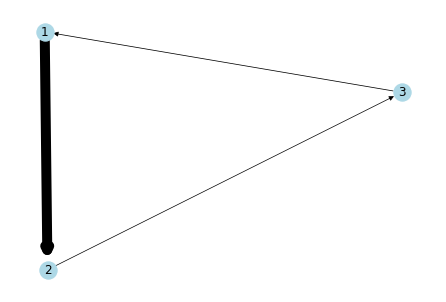

In [37]:
nx.draw(DG, with_labels=True, width=list(weights), node_color='lightblue')

In [38]:
DG.out_degree(1, weight='weight')

10

In [43]:
DG.in_degree(1, weight='weight')

0.75

In [39]:
DG.degree(1, weight='weight')

10.75

In [40]:
list(DG.successors(1))


[2]

In [42]:
list(DG.predecessors(1))

[3]

In [41]:
list(DG.neighbors(1))

[2]

### More graph analysis functions

### Degree centrality
is a measure of the number of connections a particular node has in the network.

It is based on the idea that important nodes have many connections. 

The degree centrality for a node `v` is the fraction of nodes 
    connected to it.
    
The NetworkX function degree_centrality() calculates the degree centrality of all the nodes of a network.

#### Eigenvector centrality 
Is a measure of a node (person’s) connection to those who are highly connected. A node (person) with a high score will be someone who is influencing multiple players (who in turn are highly connected)

A node is considered important if it is connected to other important nodes. 
The eigenvector_centrality() function of NetworkX calculates eigenvector centrality of all the nodes in a network.


#### Betweenness Centrality

The Betweenness Centrality represents the frequency at which a point occurs on the shortest paths that connect pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. 

The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. 

The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a position can influence the whole group, by either withholding or coloring the information in transmission.

### Karate Club graph example

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. 

The network models the relationships between 34 members of a karate club: with each node representing an individual, and the links/edges representing individuals who interact outside of the karate club setting (e.g. spending social time together, like meeting up for a coffee, seperate to karate).

During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. 

Half of the members formed a new club around Mr. Hi.

Members from the other part found a new instructor or gave up karate. 

Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

Node 0 stands for the instructor, node 33 for the club administrator / president.

In [44]:
G_karate = nx.karate_club_graph()


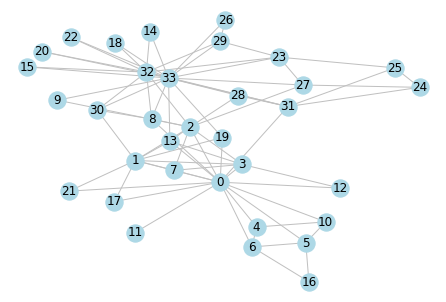

In [47]:
nx.draw(G_karate, with_labels=True,node_color='lightblue', edge_color='silver' )

In [48]:

betCent = nx.betweenness_centrality(G_karate, normalized=True, endpoints=True)
print(betCent)

{0: 0.4707155589508531, 1: 0.1095874713521772, 2: 0.19402993520640582, 3: 0.07003225532637297, 4: 0.059417706476530004, 5: 0.08704693998811645, 6: 0.08704693998811644, 7: 0.058823529411764705, 8: 0.111460543813485, 9: 0.05962142432730668, 10: 0.05941770647653, 11: 0.058823529411764705, 12: 0.058823529411764705, 13: 0.10198907845966672, 14: 0.058823529411764705, 15: 0.058823529411764705, 16: 0.058823529411764705, 17: 0.058823529411764705, 18: 0.058823529411764705, 19: 0.08938828056475116, 20: 0.058823529411764705, 21: 0.058823529411764705, 22: 0.058823529411764705, 23: 0.07540106951871657, 24: 0.06090314913844326, 25: 0.06243810655575361, 26: 0.058823529411764705, 27: 0.07984325043148571, 28: 0.06051268992445463, 29: 0.06157372039724981, 30: 0.07238774297597828, 31: 0.18896528308293015, 32: 0.19552669552669552, 33: 0.34501174207056556}


In [32]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[0, 33, 32, 2, 31]

We can visualize the network by mapping node degree to color and node Betweenness Centrality to size.

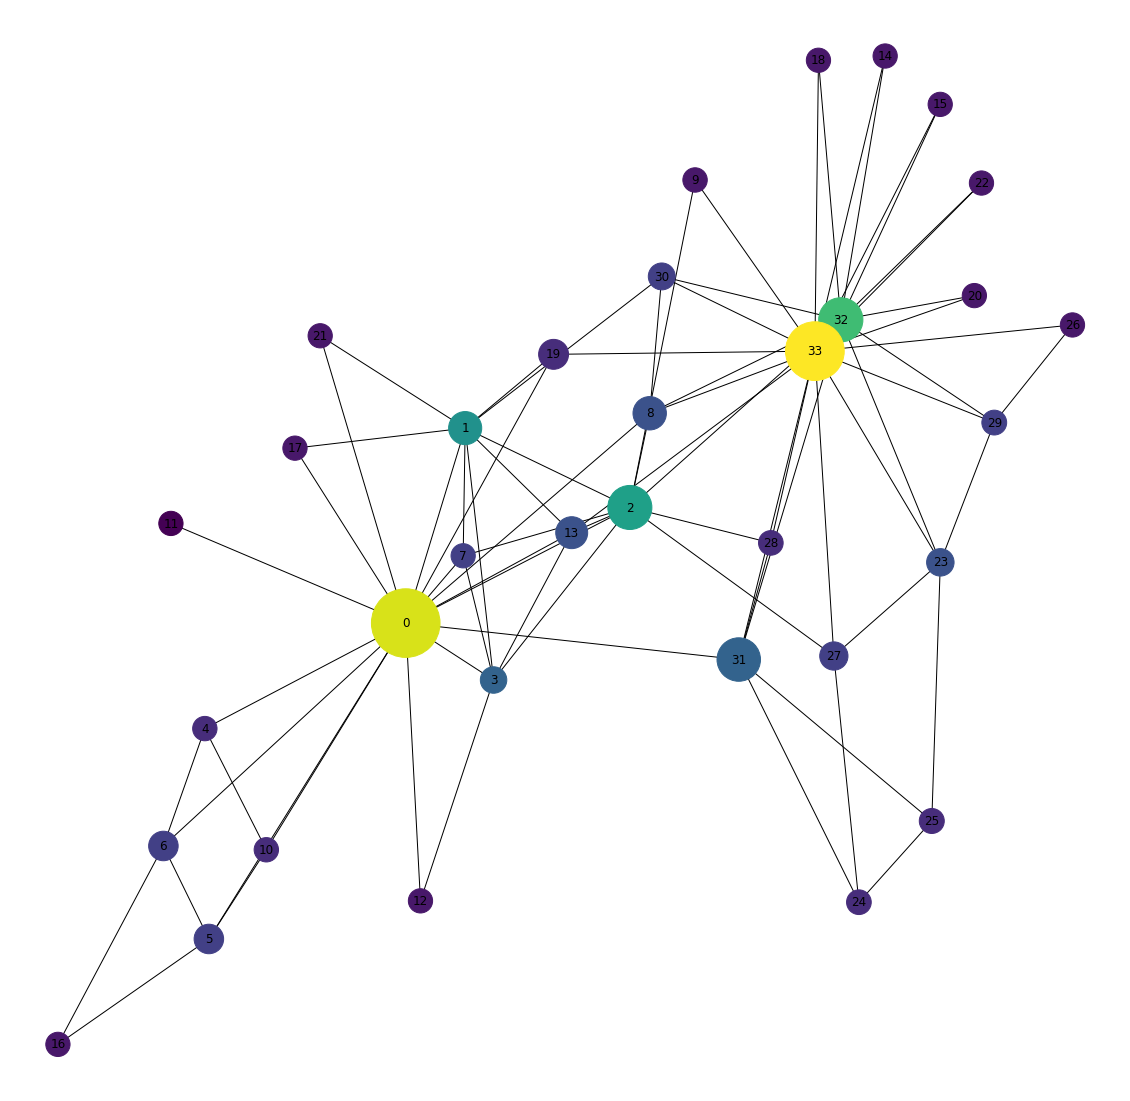

In [49]:
pos = nx.spring_layout(G_karate)
node_color = [20000.0 * G_karate.degree(v) for v in G_karate]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_karate, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [51]:
eigCent = nx.eigenvector_centrality(G_karate)
print(eigCent)

{0: 0.3554834941851943, 1: 0.2659538704545025, 2: 0.31718938996844476, 3: 0.2111740783205706, 4: 0.07596645881657382, 5: 0.07948057788594247, 6: 0.07948057788594247, 7: 0.17095511498035434, 8: 0.2274050914716605, 9: 0.10267519030637758, 10: 0.07596645881657381, 11: 0.05285416945233648, 12: 0.08425192086558088, 13: 0.22646969838808148, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.023634794260596875, 17: 0.09239675666845953, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.09239675666845953, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.05705373563802805, 25: 0.05920820250279008, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493085, 31: 0.19103626979791702, 32: 0.3086510477336959, 33: 0.373371213013235}


In [54]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

[33, 0, 2, 32, 1]

In [52]:
sorted((v, f"{c:0.2f}") for v, c in eigCent.items())

[(0, '0.36'),
 (1, '0.27'),
 (2, '0.32'),
 (3, '0.21'),
 (4, '0.08'),
 (5, '0.08'),
 (6, '0.08'),
 (7, '0.17'),
 (8, '0.23'),
 (9, '0.10'),
 (10, '0.08'),
 (11, '0.05'),
 (12, '0.08'),
 (13, '0.23'),
 (14, '0.10'),
 (15, '0.10'),
 (16, '0.02'),
 (17, '0.09'),
 (18, '0.10'),
 (19, '0.15'),
 (20, '0.10'),
 (21, '0.09'),
 (22, '0.10'),
 (23, '0.15'),
 (24, '0.06'),
 (25, '0.06'),
 (26, '0.08'),
 (27, '0.13'),
 (28, '0.13'),
 (29, '0.13'),
 (30, '0.17'),
 (31, '0.19'),
 (32, '0.31'),
 (33, '0.37')]

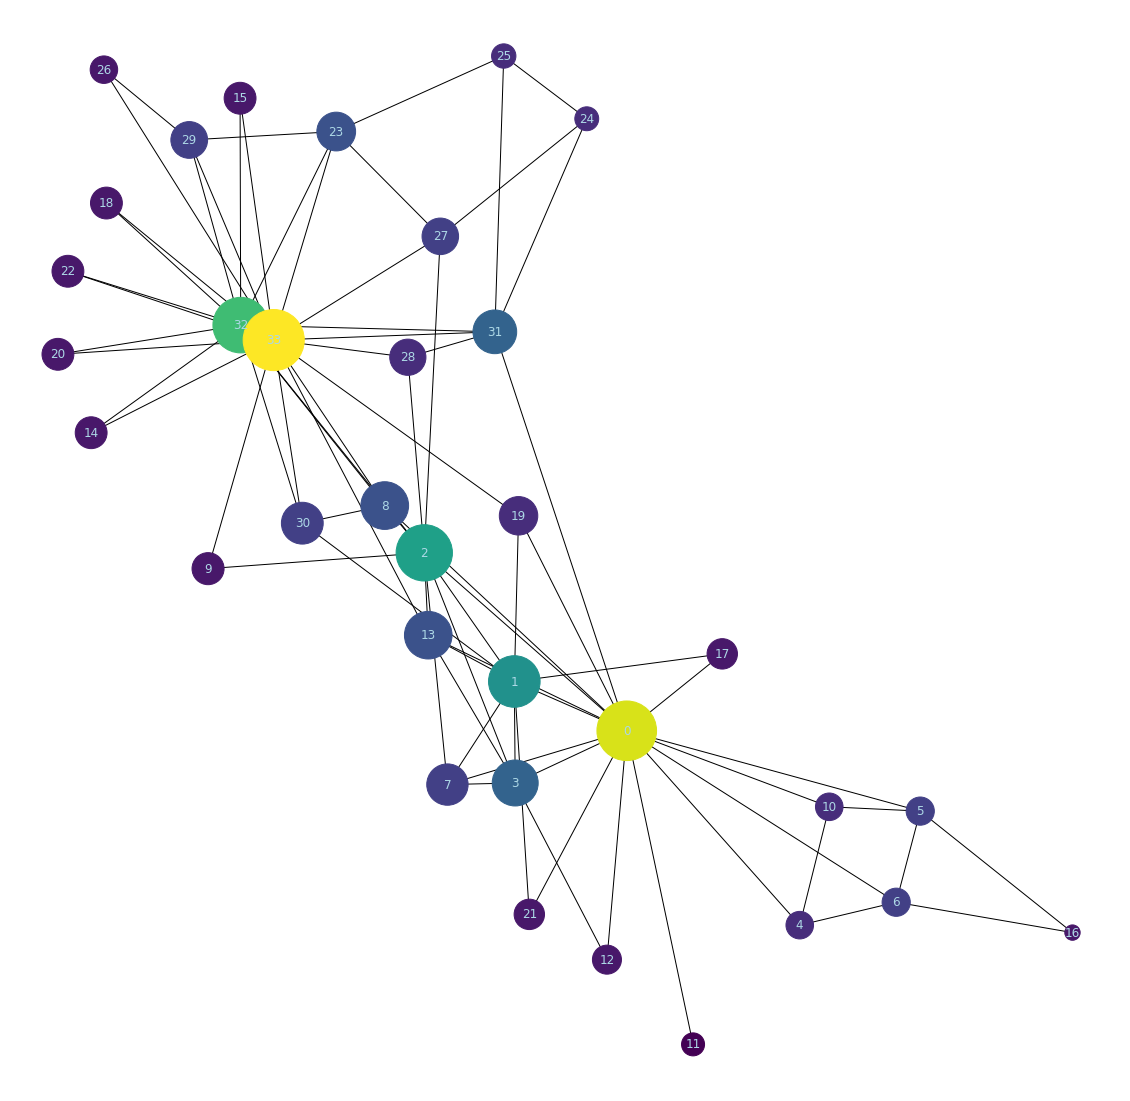

In [53]:
pos = nx.spring_layout(G_karate)
node_color = [20000.0 * G_karate.degree(v) for v in G_karate]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_karate, pos=pos, with_labels=True,font_color='lightblue',
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

### Assortativity
or assortative mixing is a preference for a network's nodes to attach to others that are similar in some way. 

The specific measure of similarity may vary,  but it is often assessed in terms of a node's degree.

In social networks, nodes tend to be connected with other nodes with similar degree values. 

In constrast, technological and biological networks typically show disassortative mixing, or disassortativity, as high degree nodes tend to attach to low degree nodes.

The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. 

Positive values of r indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree. In general, r lies between −1 and 1. When r = 1, the network is said to have perfect assortative mixing patterns, when r = 0 the network is non-assortative, while at r = −1 the network is completely disassortative.

In [55]:
r = nx.degree_assortativity_coefficient(G_karate)
print(f"{r:3.1f}")

-0.5


### Community detection:

The problem of finding groups of nodes in networks is called community detection. The purpose of community detection is to find tightly knit communities of nodes which have weaker ties between different communities.

Community detection algorithms can be of multiple types. 


### Functions for computing and measuring community structure in NetworkX.

The functions in this class are not imported into the top-level networkx namespace. You can access these functions by importing the networkx.algorithms.community module, then accessing the functions as attributes of community

In [56]:
 import networkx.algorithms.community as nxcom

Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

Modularity is one metric of the structure of networks which measures the strength of division of a network into modules (also called groups, clusters or communities). Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules. 

In [57]:
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


In [58]:
communities

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

The output of community detection consists of sets of vertex numbers (set of sets). If we wish to visualize this we need to define a few utilities. 

The functions assign the community number to the nodes and edges:

In [61]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)            

In [62]:
# Set node and edge communities
    set_node_community(G_karate, communities)
    set_edge_community(G_karate)

    node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

    # Set community color for edges between members of the same community (internal) and intra-community edges (external)
    external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
    internal_color = ['black' for e in internal]

Plot gives an idea of how the karate club splits into communities

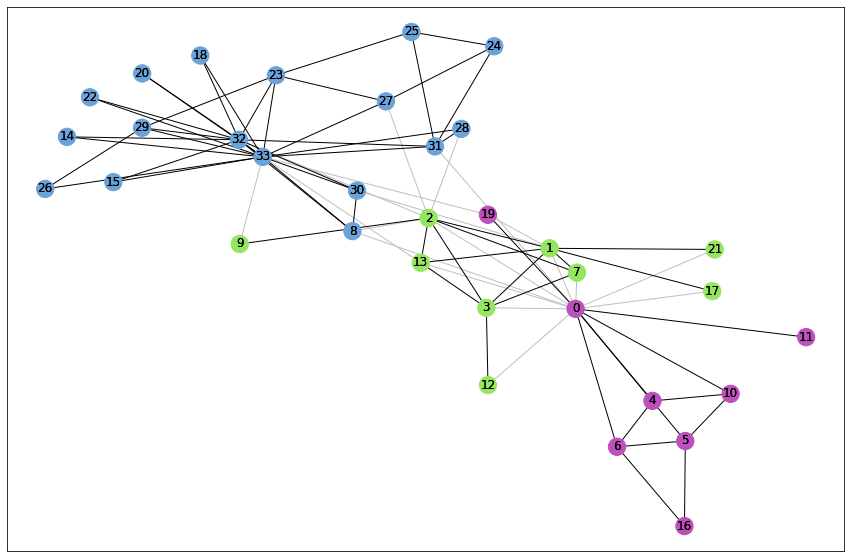

In [63]:
karate_pos = nx.spring_layout(G_karate)

plt.rcParams.update({'figure.figsize': (15, 10)})
    # Draw external edges
nx.draw_networkx(
        G_karate,
        pos=karate_pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")
    # Draw nodes and internal edges
nx.draw_networkx(
        G_karate,
        pos=karate_pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color)

### Girvan-Newman Community Detection
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.

In [64]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

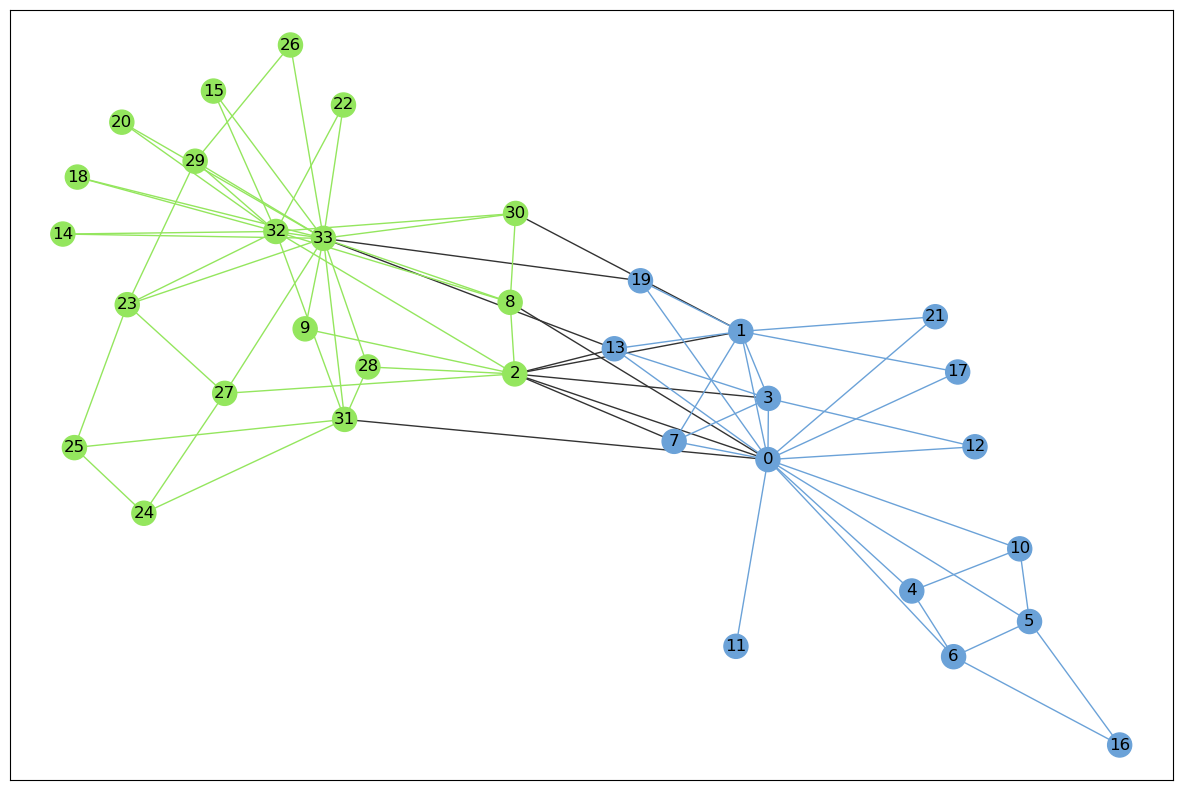

In [65]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

karate_pos = nx.spring_layout(G_karate)
 # Draw external edges
nx.draw_networkx(
        G_karate, pos=karate_pos, node_size=0,
        edgelist=external, edge_color="#333333", with_labels=False)
   # Draw nodes and internal edges
nx.draw_networkx(
        G_karate, pos=karate_pos, node_color=node_color,
        edgelist=internal, edge_color=internal_color)

#### Louvain Algorithm for Community Detection:
This algorithm works on the principle of partitioning a network into mutually exclusive communities such that the number of edges across different communities is significantly less than expectation, whereas the number of edges within each community is significantly greater than expectation. The Louvain algortihm is one of the most widely used for identifying communities due its speed and high modularity. Modularity values can span from -1 to 1, and the higher the value, the better the community structure that is formed.

It relies on the modularity optimization to extract communities. The modularity optimization is performed in two steps. The first step involves optimizing the modularity locally. In the second step, it aggregates nodes belonging to the same community into a single node and builds a new network from those aggregated nodes. These two steps are repeated iteratively until a maximum of modularity is attained. 

In [42]:
import community as community_louvain

In [ ]:
G_karate = nx.karate_club_graph()

In [43]:
partition = community_louvain.best_partition(G_karate)

In [44]:
import matplotlib.cm as cm

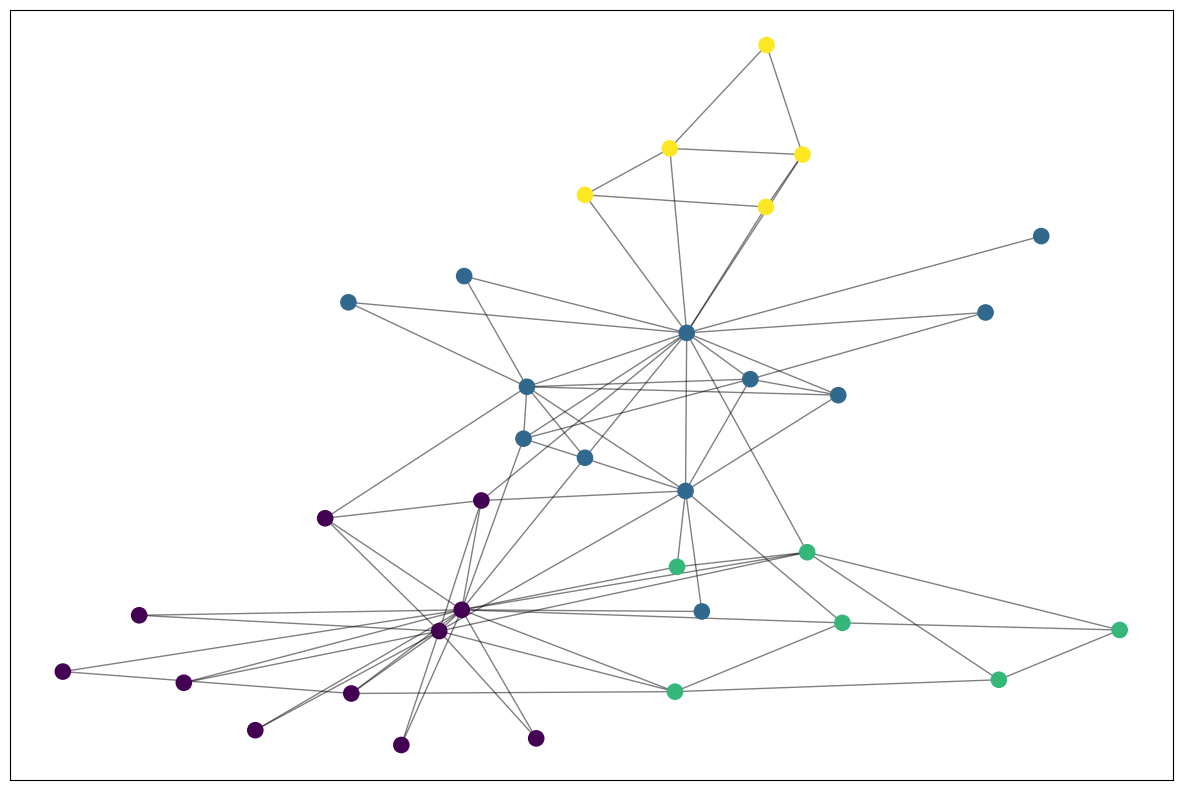

In [48]:
pos = nx.spring_layout(G_karate)
 # color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_karate, pos, partition.keys(), node_size=120,
cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_karate, pos, alpha=0.5)
plt.show()

### Cliques
A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. Cliques are in a way tight communities where every nodes is connected to every other.

We can identify the largest clique in the karate club.

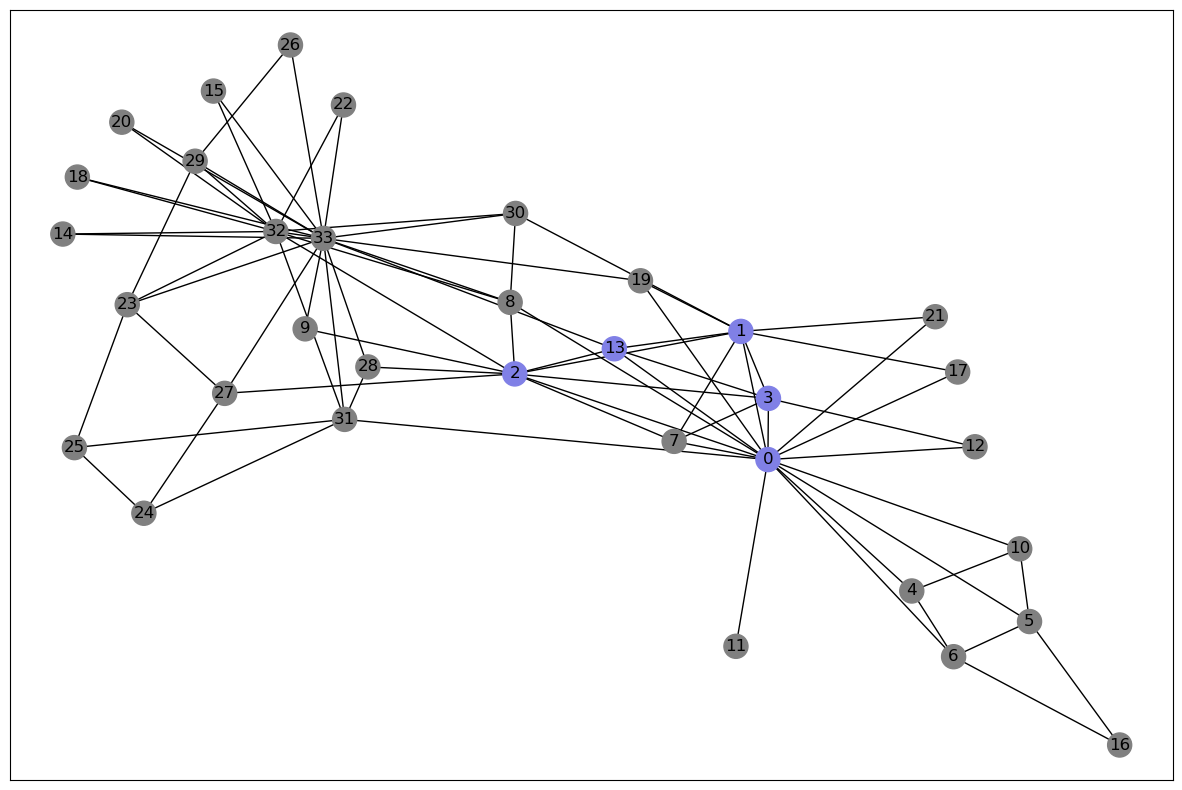

In [66]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
cliques = list(nx.find_cliques(G_karate))
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
        if v in max_clique:
            node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)

### K-Cores
A k-core of a graph G is a maximal connected subgraph of G in which all vertices have degree at least k. Equivalently, it is one of the connected components of the subgraph of G formed by repeatedly deleting all vertices of degree less than k. 

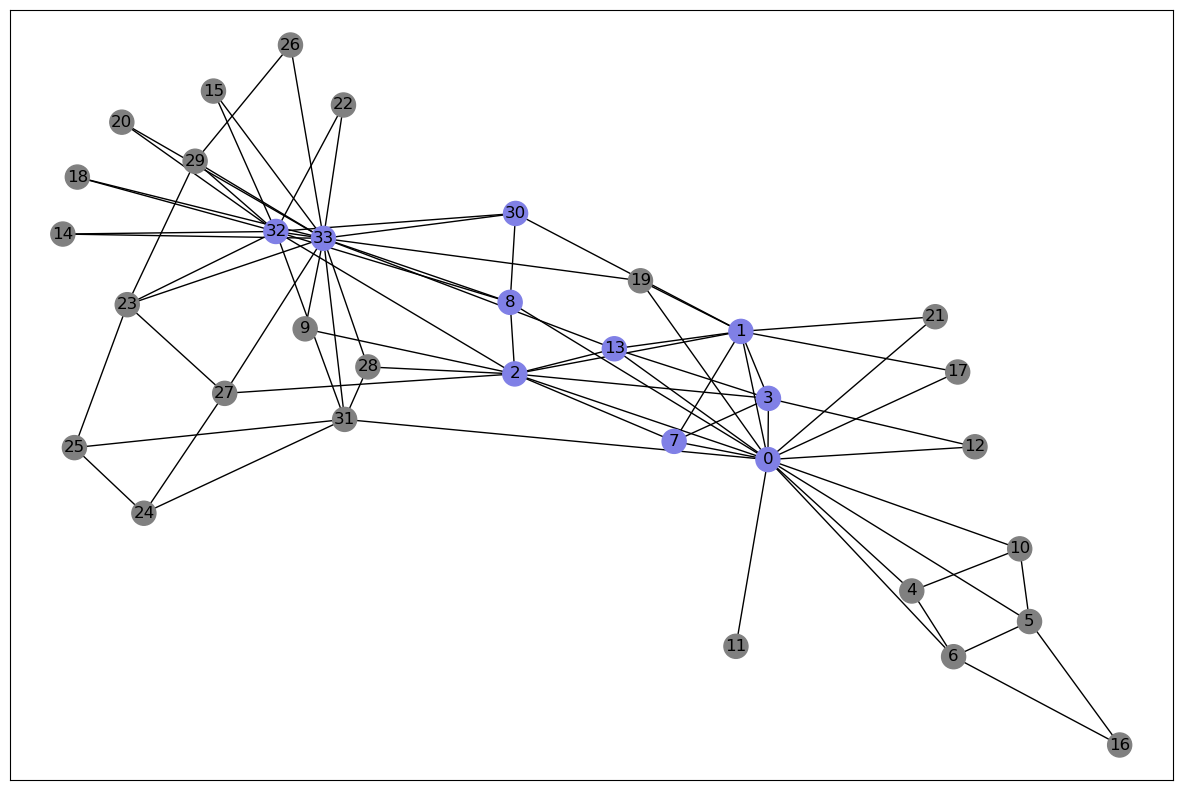

In [68]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
kcores = list(nx.k_core(G_karate))
#max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
        if v in kcores:
            node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)